# <b> Exploratory Data Analysis on Quran Dataset</b>

<h3> About Holy Quran: </h3>
The Holy Quran is the central text for 1.5 billion Muslims around the world. It literally means "The Recitation." It is undoubtedly the finest work in Arabic literature and revealed by Allah (God) to His Messenger Prophet Muhammed (Peace Be Upon Him) through angel Gabriel. It was revealed verbally from December 22, 609 (AD) to 632 AD (when Prophet Muhammed (Peace Be Upon Him) died)

The book is divided into 30 parts, 114 Chapters and 6,000+ verses.

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# Loading and understanding dataset

In [3]:
quran_english = pd.read_csv('./datasets/en.yusufali.csv')

quran_english

,Surah,Ayah,Text
0,1,1,"In the name of Allah, Most Gracious, Most Merc..."
1,1,2,"Praise be to Allah, the Cherisher and Sustaine..."
2,1,3,"Most Gracious, Most Merciful;"
3,1,4,Master of the Day of Judgment.
4,1,5,"Thee do we worship, and Thine aid we seek."
...,...,...,...
6231,114,2,"The King (or Ruler) of Mankind,"
6232,114,3,"The god (or judge) of Mankind,-"
6233,114,4,"From the mischief of the Whisperer (of Evil), ..."
6234,114,5,(The same) who whispers into the hearts of Man...


In [4]:
quran_english.shape

(6236, 3)

<li>The Quran has 6,236 verses, not including Bismillah.
<li> 6,348 verses including Bismillah.
<li>The Quran is divided into 114 chapters, called surahs, and each surah is divided into a number of verses, called ayat

In [5]:
quran_english[quran_english['Text'].str.contains('In the name of Allah, Most Gracious, Most Merciful')]

,Surah,Ayah,Text
0,1,1,"In the name of Allah, Most Gracious, Most Merc..."
3188,27,30,"""It is from Solomon, and is (as follows): 'In ..."


<li>"Bismillah al-Rahman al-Rahim" means "In the name of Allah, Most Gracious, Most Merciful"
<li>There is a surah which has verse containing "Bismillah" i.e Verse 30 in Chapter 27

In [6]:
# Checking for null values if any to make sure the dataset is error free.
quran_english.isna().sum()

Surah    0
Ayah     0
Text     0
dtype: int64

In [7]:
# Importing surah names file which I have made
surah_names = pd.read_csv('./datasets/surah_names_english.csv', names=['Surah', 'Surah Name'])

# Removing white space in the beginning of names
surah_names["Surah Name"] = surah_names["Surah Name"].str[1:]

surah_names


,Surah,Surah Name
0,1,Al-Fatihah (the Opening)
1,2,Al-Baqarah (the Cow)
2,3,Aali Imran (the Family of Imran)
3,4,An-Nisa’ (the Women)
4,5,Al-Ma’idah (the Table)
...,...,...
109,110,An-Nasr (the Help)
110,111,Al-Masad (the Palm Fiber)
111,112,Al-Ikhlas (the Sincerity)
112,113,Al-Falaq (the Daybreak)


In [8]:
# Merging surah names dataframe with quran dataframe on Surah no.
quran_english_with_surah = quran_english.merge(surah_names, on='Surah')
quran_english_with_surah.index = np.arange(1,6236+1)

quran_english_with_surah

,Surah,Ayah,Text,Surah Name
1,1,1,"In the name of Allah, Most Gracious, Most Merc...",Al-Fatihah (the Opening)
2,1,2,"Praise be to Allah, the Cherisher and Sustaine...",Al-Fatihah (the Opening)
3,1,3,"Most Gracious, Most Merciful;",Al-Fatihah (the Opening)
4,1,4,Master of the Day of Judgment.,Al-Fatihah (the Opening)
5,1,5,"Thee do we worship, and Thine aid we seek.",Al-Fatihah (the Opening)
...,...,...,...,...
6232,114,2,"The King (or Ruler) of Mankind,",An-Nas (Mankind)
6233,114,3,"The god (or judge) of Mankind,-",An-Nas (Mankind)
6234,114,4,"From the mischief of the Whisperer (of Evil), ...",An-Nas (Mankind)
6235,114,5,(The same) who whispers into the hearts of Man...,An-Nas (Mankind)


# <b>Performing EDA to find answers and useful insights and facts from<br>Al-Quran

# Numbers of verses in each chapter.

In [9]:
quran_english_with_surah["Surah Name"].value_counts()

Surah Name
Al-Baqarah (the Cow)                   286
Ash-Shu’ara’ (the Poets)               227
Al-A’raf (the Heights)                 206
Aali Imran (the Family of Imran)       200
As-Saffah (Those Ranges in Ranks)      182
                                      ... 
Quraish (Quraish)                        4
Al-Ikhlas (the Sincerity)                4
Al-‘Asr (the Time)                       3
Al-Kauthar (the River of Abundance)      3
An-Nasr (the Help)                       3
Name: count, Length: 114, dtype: int64

In [10]:
# Splitting quran dataset into 3 parts

# From Chapter 1 - 39
surah_1_39 = quran_english_with_surah[quran_english_with_surah['Surah'] < 40] 

# From Chapter 40 - 79
surah_40_79 = quran_english_with_surah[(quran_english_with_surah['Surah'] > 39) & (quran_english_with_surah['Surah'] < 80)]

# From Chapter 80 - 144
surah_80_114 = quran_english_with_surah[quran_english_with_surah['Surah'] > 79]

In [11]:
surah_1_39

,Surah,Ayah,Text,Surah Name
1,1,1,"In the name of Allah, Most Gracious, Most Merc...",Al-Fatihah (the Opening)
2,1,2,"Praise be to Allah, the Cherisher and Sustaine...",Al-Fatihah (the Opening)
3,1,3,"Most Gracious, Most Merciful;",Al-Fatihah (the Opening)
4,1,4,Master of the Day of Judgment.,Al-Fatihah (the Opening)
5,1,5,"Thee do we worship, and Thine aid we seek.",Al-Fatihah (the Opening)
...,...,...,...,...
4129,39,71,The Unbelievers will be led to Hell in crowd: ...,Az-Zumar (the Groups)
4130,39,72,"(To them) will be said: ""Enter ye the gates of...",Az-Zumar (the Groups)
4131,39,73,And those who feared their Lord will be led to...,Az-Zumar (the Groups)
4132,39,74,"They will say: ""Praise be to Allah, Who has tr...",Az-Zumar (the Groups)


### Plotting all Surah with their verses count

In [21]:
# Function for making and displaying a count plot
def quran_chapters_verses_countplot(dataframe, y_axis, title):
    # Setting figures size and theme
    plt.figure(figsize=(6,10))
    sns.set_style('darkgrid')

    # Countplot to count the number of verses of each chapter and plot
    ax = sns.countplot(data=dataframe, y=y_axis, hue=y_axis, palette='viridis')

    # Setting labels for each bar
    for container in ax.containers:
        ax.bar_label(container, size=10, padding=2)

    # Customizing plot
    ax.set_title(title, fontweight='bold', fontsize=12)
    ax.set_ylabel('Chapters (Surahs)', fontweight='bold')
    ax.set_xlabel('Verses', fontweight='bold')
        
    plt.show()

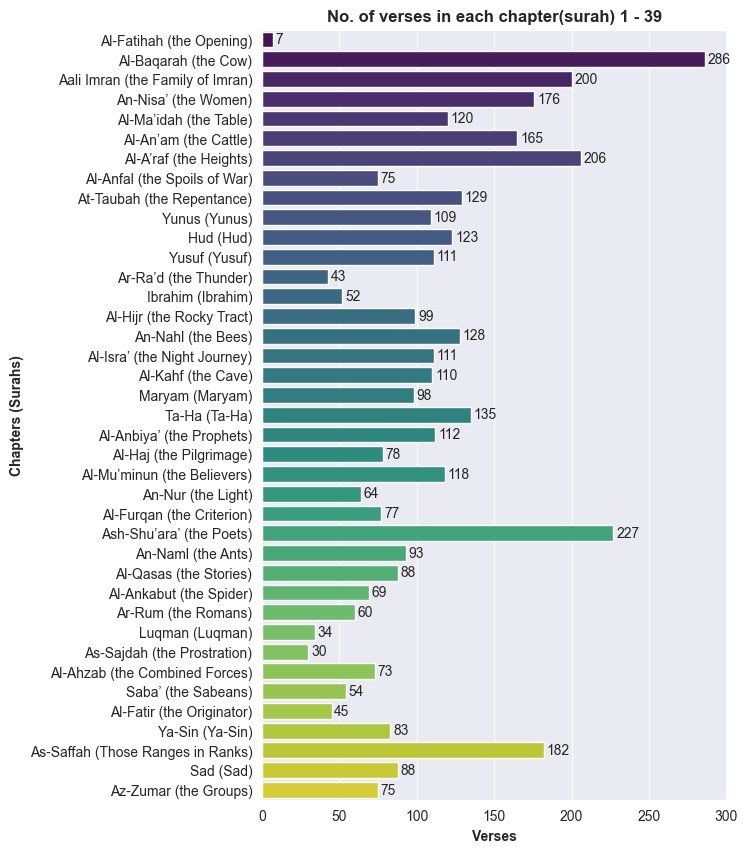

In [22]:
quran_chapters_verses_countplot(surah_1_39, 'Surah Name', 'No. of verses in each chapter(surah) 1 - 39')

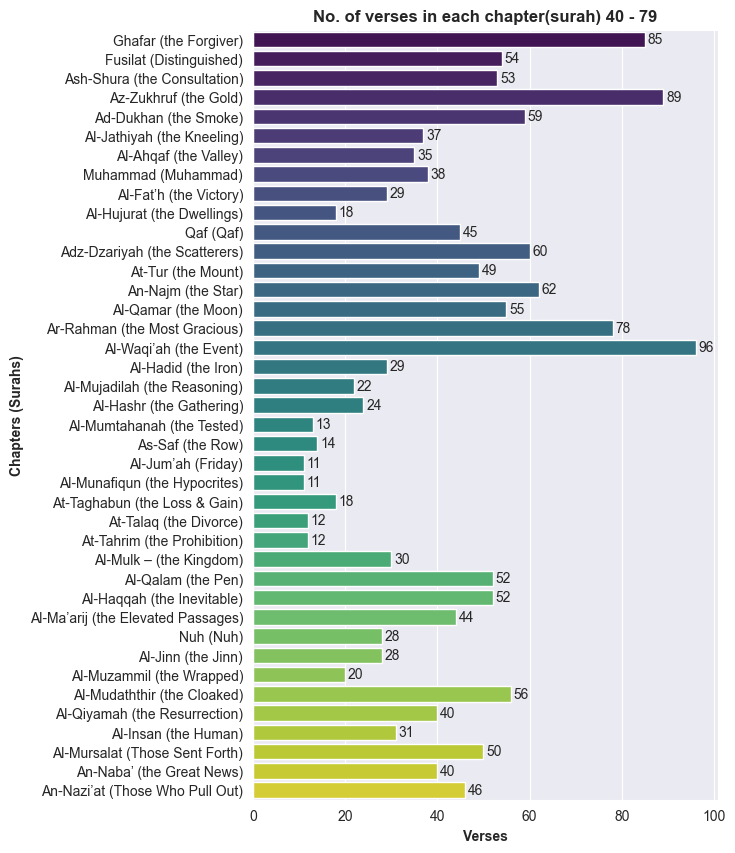

In [23]:
quran_chapters_verses_countplot(surah_40_79, 'Surah Name', 'No. of verses in each chapter(surah) 40 - 79')

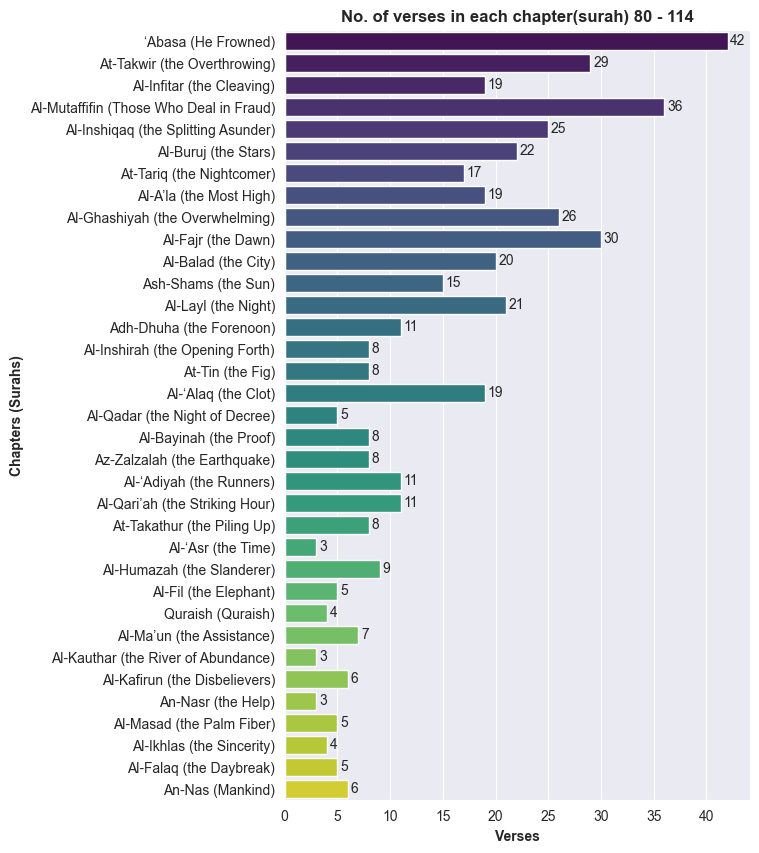

In [24]:
quran_chapters_verses_countplot(surah_80_114, 'Surah Name', 'No. of verses in each chapter(surah) 80 - 114')

<li> Al-Baqarah is the lengthiest chapter.
<li> Al-Asr, Al-Kauthar and Al-Nasr are the shortest chapters with 3 verses only.

# Prophets name's frequency 

In [15]:
# Importing library for regular expression functions
import re

# List of all the prophets mentioned in the Quran
prophet_names = [ "Isma'il", 'Elisha', 'Zul-Kifl', 'Jesus', 'Moses', "Shu'aib", 'Jacob', 'Lut',
                 'Joseph', 'Isaac', 'Job', 'Aaron', 'Abraham', 'Noah', 'Adam', 'Hud', 'Solomon', 
                 'David', 'Zakariya', 'Yahya', 'Elias', 'Jonah', 'Idris', 'Salih', 'Muhammad']

# Making a empty dicitonary
prophet_names_freq = {}

# Initializing with all prophet names as key and 0 value(i.e count)
for prophet in prophet_names:
    prophet_names_freq[prophet.lower()] = 0
    
# Code for counting prophet names, start by looping in Quran dataframe
for lab,row in quran_english.iterrows():
    
    # Extract each verse and split the words and store in a list
    ayah_word_list = row['Text'].split(' ') 
    
    # Loop through verse list to access each word
    for word in ayah_word_list:
        # Lower casing the word and remove any special characters from it through RE
        word = word.lower()
        pattern = re.compile('[^a-zA-Z-\']') 
        word = pattern.sub('', word) 
        
        # If the word is present in prophet names dict then increase count value
        if word in prophet_names_freq:
            prophet_names_freq[word] += 1

# Making a dataframe with the prophets dictionary           
prophet_names_df = pd.DataFrame({ 'Name' : list(prophet_names_freq.keys()),
                                  'Frequency' : list(prophet_names_freq.values())})

prophet_names_df['Name'] = prophet_names_df['Name'].apply(str.capitalize)

prophet_names_df.sort_values('Frequency', ascending=False, inplace=True)

C:\Users\alibi\AppData\Local\Temp\ipykernel_384\2174795565.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=prophet_names_df, x='Name', y='Frequency',palette='husl')


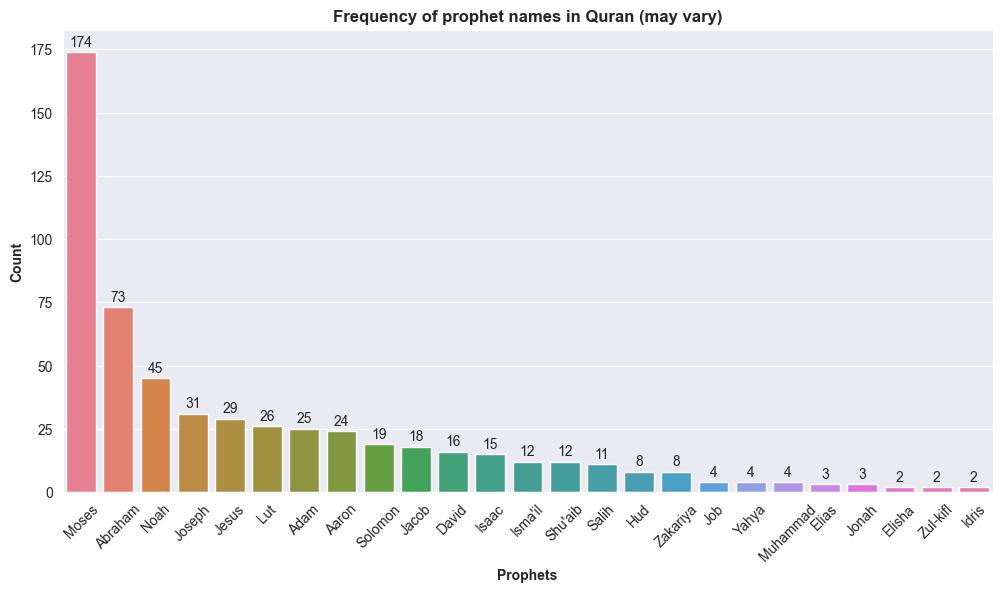

In [16]:
# Plotting the graph
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
ax = sns.barplot(data=prophet_names_df, x='Name', y='Frequency',palette='husl')

for container in ax.containers:
    ax.bar_label(container, size=10, padding=2)
    
ax.set_title("Frequency of prophet names in Quran (may vary)", fontweight='bold', fontsize=12)
ax.set_ylabel("Count", fontweight='bold')
ax.set_xlabel("Prophets", fontweight='bold')
ax.tick_params('x', rotation=45)
    
plt.show()

<li> Moses (Musa A.S) is mentioned the most in Quran followed by Abraham, Noah and Joseph(Yusuf) A.S.
<li> These frequencies may vary from translation to translation of differents languages and Mufasirs.

# Word cloud of Quran and different chapters.

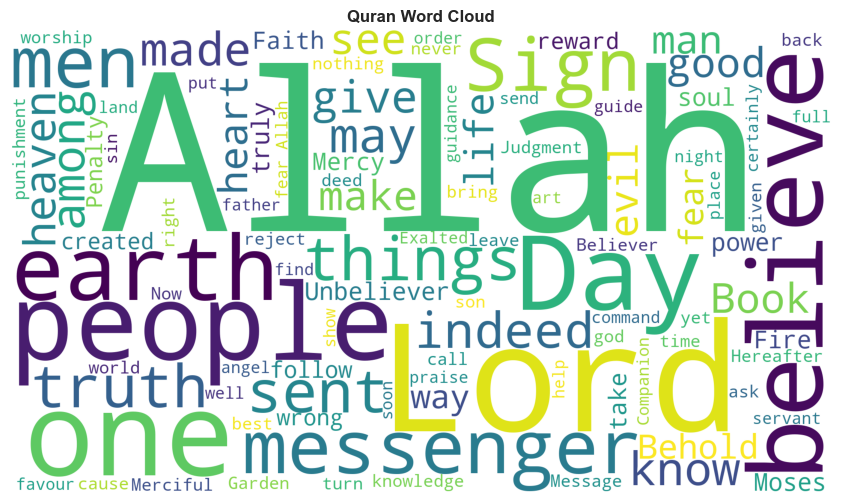

In [17]:
def word_cloud_generator(text_corpus, stopwords, title, maxwords):
    word_cloud = WordCloud( background_color='white', stopwords=stopwords, height=1080, width=1920, max_words=maxwords)
    word_cloud.generate(text_corpus)

    plt.figure(figsize=( 12,6))
    plt.imshow(word_cloud)
    plt.title(title, fontweight='bold', fontsize=12)
    plt.axis('off')
    plt.show()

quranic_stop_words = ['ye', 'verily', 'will', 'said', 'say', 'us', 'thy', 'thee', 'O', 'except', 'Nay',
                      'thou' ,'hath', 'Thus', 'none', 'therein', 'come', 'came', 'even', 'two', 'word', 'every',
                      'let', 'thing', 'with', 'whose', 'forth', 'wouldst', 'set', 'unto']
stopwords = STOPWORDS.update(quranic_stop_words)


quran_text = ""
for lab,row in quran_english.iterrows():
    quran_text += row['Text']

word_cloud_generator(quran_text, stopwords, 'Quran Word Cloud', 100)

- You can see the words which are more frequent and have more emphasis

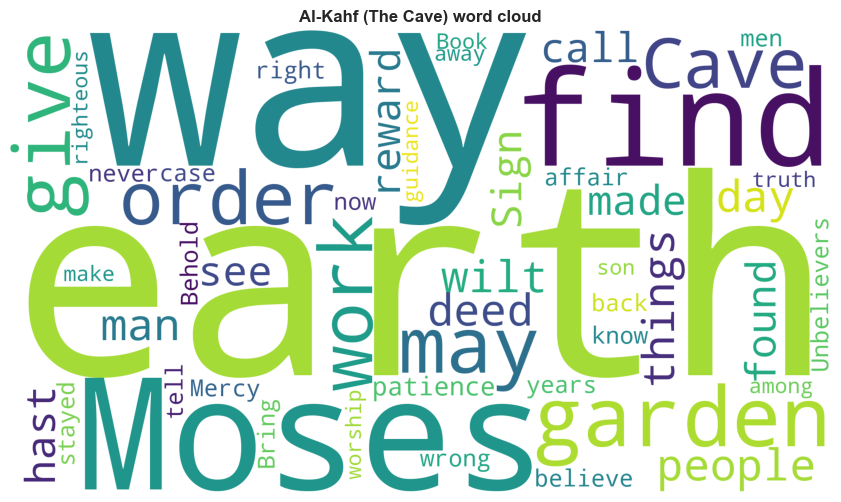

In [18]:
surah_kahf = quran_english_with_surah[quran_english_with_surah['Surah'] == 18]
surah_kahf_text = ""
for lab,row in surah_kahf.iterrows():
    surah_kahf_text += row['Text']
stopwords2 = list(STOPWORDS) + ['Allah', 'Lord', 'one', 'best']
word_cloud_generator(surah_kahf_text, stopwords2, 'Al-Kahf (The Cave) word cloud', 50)

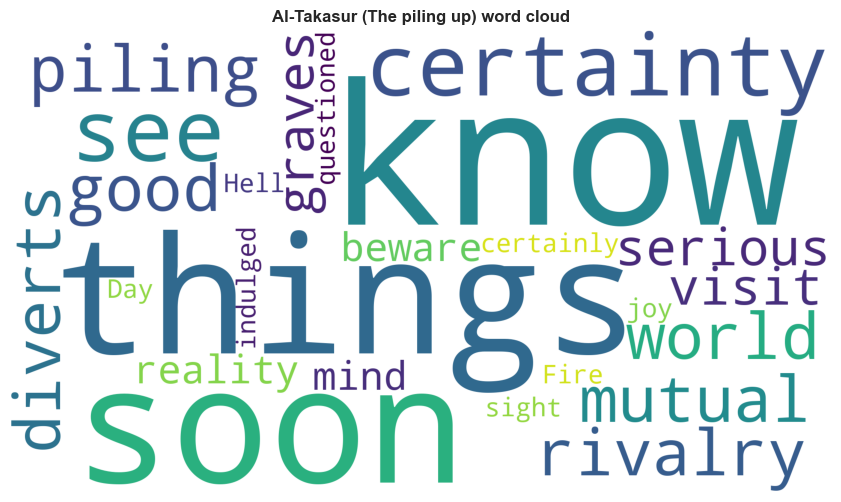

In [19]:
surah_takasur = quran_english_with_surah[quran_english_with_surah['Surah'] == 102]

surah_takasur_text = ""
for lab,row in surah_takasur.iterrows():
    surah_takasur_text += row['Text']
    
word_cloud_generator(surah_takasur_text, stopwords, 'Al-Takasur (The piling up) word cloud', 50)

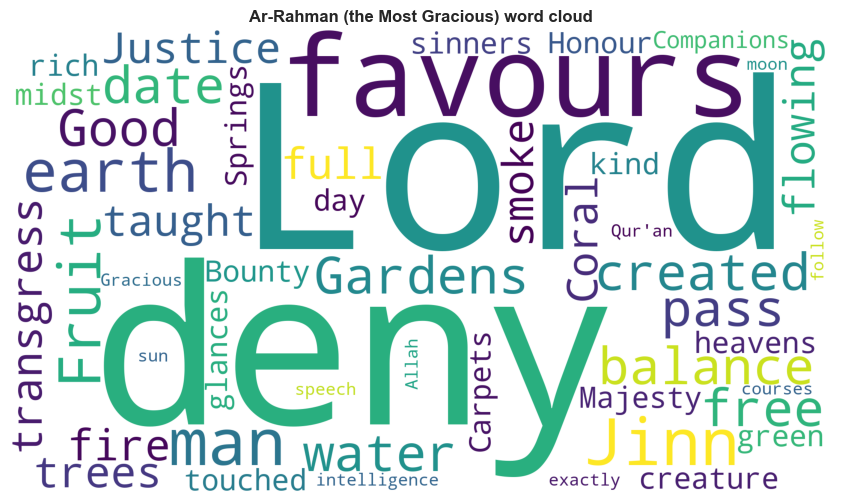

In [20]:
surah_rahman = quran_english_with_surah[quran_english_with_surah['Surah'] == 55]

surah_rahman_text = ""
for lab,row in surah_rahman.iterrows():
    surah_rahman_text += row['Text']
    
word_cloud_generator(surah_rahman_text, stopwords,'Ar-Rahman (the Most Gracious) word cloud', 50)